In [1]:
import pandas as pd
import numpy as np

In [14]:
comments_df = pd.read_csv('comments_0-30000.csv')
users_df = pd.read_csv('users_0-30000.csv')

In [3]:
users_df.head()

,id,first_name,last_name,deactivated,is_closed,bdate,city,country,followers_count,has_photo,home_town,is_no_index,sex,verified
0,70254599,Ирина,Зубцова-Цибульските,NaN,True,10.11,NaN,Россия,NaN,1,NaN,True,1,0.0
1,704643104,Антон,Соболев,banned,False,14.1,NaN,NaN,NaN,0,NaN,NaN,2,NaN
2,753139749,Ольга,Пугачева,banned,False,15.4.2000,Санкт-Петербург,NaN,NaN,0,NaN,NaN,1,NaN
3,83492901,Виктория,Мухина,NaN,False,10.1,Varna,Болгария,741.0,1,NaN,True,1,0.0
4,589824040,Ксения,Славина,NaN,True,NaN,Егорьевск,Россия,NaN,1,NaN,True,1,0.0


In [8]:
active_commentators_df = comments.groupby('from_id')['id'].count().sort_values(ascending=False)
active_commentators_df.head()

from_id
0            15130
112767314     1082
305130718      740
710443484      712
1011198        646
Name: id, dtype: int64

In [12]:
users_df.loc[users_df['id'] == 1011198]

,id,first_name,last_name,deactivated,is_closed,bdate,city,country,followers_count,has_photo,home_town,is_no_index,sex,verified
31629,1011198,Екатерина,Валентинова,NaN,True,NaN,Санкт-Петербург,Россия,NaN,1,NaN,True,1,0.0


In [15]:
comments_df.head()

,Unnamed: 0,id,post_id,from_id,date,likes,reply_to_comment,text
0,0,5188043,5187887,0,1685077700,0,NaN,NaN
1,1,5188229,5187887,801731288,1685085644,0,NaN,ну вот и очередной теракт Украина провела. ясм...
2,2,5188483,5187887,690352028,1685093934,0,NaN,Этой ночью наши войска хорошенько прошлись по ...
3,3,5188843,5188835,704410107,1685102649,0,NaN,NaN
4,4,5188857,5188835,804081222,1685103137,0,NaN,Сборище воров и преступников


In [23]:
avg_coms = comments_df.groupby('from_id')['post_id'].count().div(comments_df.groupby('from_id')['post_id'].nunique()).dropna()

In [31]:
avg_coms.sort_values(ascending=False)

from_id
 780026000    43.0
 501693645    12.0
 3095007      11.0
 493152417    10.0
 717853312    10.0
              ... 
 575649485     1.0
 575595336     1.0
 575590307     1.0
 575541848     1.0
-217755547     1.0
Name: post_id, Length: 44224, dtype: float64

In [35]:
users_df.loc[users_df.id.isin([780026000, 501693645, 3095007, 493152417])]

,id,first_name,last_name,deactivated,is_closed,bdate,city,country,followers_count,has_photo,home_town,is_no_index,sex,verified
5674,780026000,Артём,Шевченко,NaN,False,20.9.1994,NaN,NaN,76.0,0,NaN,False,2,0.0
20168,493152417,Ася,Заманова,NaN,False,9.11.1994,Сочи,Россия,201.0,1,NaN,False,1,0.0
27204,3095007,Светлана,Гасимова,NaN,False,9.9,Челябинск,Россия,287.0,1,NaN,False,1,0.0
27434,501693645,Юлия,Коваленко,NaN,False,NaN,Новосибирск,Россия,248.0,1,NaN,False,1,0.0


In [36]:
users_df.groupby('sex').count()

,id,first_name,last_name,deactivated,is_closed,bdate,city,country,followers_count,has_photo,home_town,is_no_index,verified
sex,,,,,,,,,,,,,
0,24,24,23,0,24,4,3,3,22,24,1,24,24
1,19540,19540,19499,2575,19540,15753,10372,10887,11454,19540,2854,16982,16982
2,24478,24478,24346,2501,24478,19015,14287,15342,14368,24478,3943,22012,22012


In [39]:
users_df.verified[users_df.verified == 0].count()

39014

In [40]:
comments_df.head()

,Unnamed: 0,id,post_id,from_id,date,likes,reply_to_comment,text
0,0,5188043,5187887,0,1685077700,0,NaN,NaN
1,1,5188229,5187887,801731288,1685085644,0,NaN,ну вот и очередной теракт Украина провела. ясм...
2,2,5188483,5187887,690352028,1685093934,0,NaN,Этой ночью наши войска хорошенько прошлись по ...
3,3,5188843,5188835,704410107,1685102649,0,NaN,NaN
4,4,5188857,5188835,804081222,1685103137,0,NaN,Сборище воров и преступников


In [45]:
comments.groupby('from_id')['likes'].sum().sort_values(ascending=False).head()

from_id
1011198      4564
153563384    3940
251160986    3591
475427334    2274
493271646    2171
Name: likes, dtype: int64

In [47]:
users_df.groupby('is_closed').count()

,id,first_name,last_name,deactivated,bdate,city,country,followers_count,has_photo,home_town,is_no_index,sex,verified
is_closed,,,,,,,,,,,,,
False,28505,28505,28386,2712,23361,16432,17257,25844,28505,6798,25844,28505,25844
True,15537,15537,15482,2364,11411,8230,8975,0,15537,0,13174,15537,13174


In [51]:
import datetime
bdates = list(users_df.bdate.dropna().values)

In [52]:
bdates[:10]

['10.11',
 '14.1',
 '15.4.2000',
 '10.1',
 '19.6.2001',
 '6.8',
 '20.7',
 '18.5.1955',
 '20.11',
 '10.9.1968']

In [53]:
b_months = [int(s.split('.')[1]) for s in bdates]

In [55]:
b_months[:10]

[11, 1, 4, 1, 6, 8, 7, 5, 11, 9]

In [56]:
from matplotlib import pyplot as plt

(array([3348., 2807., 3034., 2966., 2996., 2782., 2821., 2889., 2749.,
        2794., 2779., 2807.]),
 array([ 1.        ,  1.91666667,  2.83333333,  3.75      ,  4.66666667,
         5.58333333,  6.5       ,  7.41666667,  8.33333333,  9.25      ,
        10.16666667, 11.08333333, 12.        ]),
 <BarContainer object of 12 artists>)

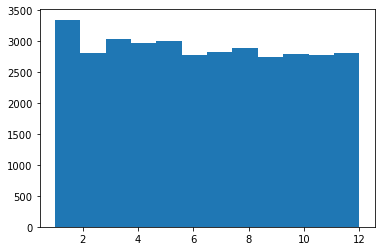

In [57]:
plt.hist(b_months, bins=12)